In [120]:
import requests
import pandas as pd
import datetime


In [78]:
api_key = 'fb365aa6104829b44455572365ff3b4e'
lat = 18.184135
lon = 74.610764

In [79]:
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

In [80]:
response = requests.get(api_url)


In [81]:
weather_data = response.json() 
# Extract relevant weather information
timestamps = [pd.to_datetime(data['dt'], unit='s') for data in weather_data['list']]
temperatures = [data['main']['temp'] -273.15  for data in weather_data['list']]
humidity = [data['main']['humidity'] for data in weather_data['list']]
wind_speed = [data['wind']['speed'] for data in weather_data['list']]
weather_description = [data['weather'][0]['description'] for data in weather_data['list']]

In [82]:
weather_data

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1698915600,
   'main': {'temp': 302.48,
    'feels_like': 301.66,
    'temp_min': 302.48,
    'temp_max': 304.24,
    'pressure': 1013,
    'sea_level': 1013,
    'grnd_level': 948,
    'humidity': 35,
    'temp_kf': -1.76},
   'weather': [{'id': 801,
     'main': 'Clouds',
     'description': 'few clouds',
     'icon': '02d'}],
   'clouds': {'all': 23},
   'wind': {'speed': 1.09, 'deg': 31, 'gust': 1.34},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'd'},
   'dt_txt': '2023-11-02 09:00:00'},
  {'dt': 1698926400,
   'main': {'temp': 302.69,
    'feels_like': 301.78,
    'temp_min': 302.69,
    'temp_max': 303.23,
    'pressure': 1011,
    'sea_level': 1011,
    'grnd_level': 948,
    'humidity': 34,
    'temp_kf': -0.54},
   'weather': [{'id': 802,
     'main': 'Clouds',
     'description': 'scattered clouds',
     'icon': '03d'}],
   'clouds': {'all': 47},
   'wind': {'speed': 2.04, 'deg': 16, 'gust': 2.2},
   'visib

In [83]:
# Create a pandas DataFrame with the extracted weather data
weather_df = pd.DataFrame({
    'Timestamp': timestamps,
    'Temperature (°C)': temperatures,
    'Humidity (%)': humidity,
    'Wind Speed (m/s)': wind_speed,
    'Weather Description': weather_description
})

In [84]:
weather_df

,Timestamp,Temperature (°C),Humidity (%),Wind Speed (m/s),Weather Description
0,2023-11-02 09:00:00,29.33,35,1.09,few clouds
1,2023-11-02 12:00:00,29.54,34,2.04,scattered clouds
2,2023-11-02 15:00:00,26.42,35,2.92,broken clouds
3,2023-11-02 18:00:00,23.92,43,2.75,scattered clouds
4,2023-11-02 21:00:00,22.13,50,2.12,scattered clouds
5,2023-11-03 00:00:00,20.62,56,1.72,scattered clouds
6,2023-11-03 03:00:00,24.68,46,2.47,few clouds
7,2023-11-03 06:00:00,29.63,35,3.02,few clouds
8,2023-11-03 09:00:00,31.83,27,1.31,scattered clouds
9,2023-11-03 12:00:00,30.60,34,0.59,few clouds


In [85]:
# Set the Timestamp column as the DataFrame's index
weather_df.set_index('Timestamp', inplace=True)

In [86]:
weather_df

,Temperature (°C),Humidity (%),Wind Speed (m/s),Weather Description
Timestamp,,,,
2023-11-02 09:00:00,29.33,35,1.09,few clouds
2023-11-02 12:00:00,29.54,34,2.04,scattered clouds
2023-11-02 15:00:00,26.42,35,2.92,broken clouds
2023-11-02 18:00:00,23.92,43,2.75,scattered clouds
2023-11-02 21:00:00,22.13,50,2.12,scattered clouds
2023-11-03 00:00:00,20.62,56,1.72,scattered clouds
2023-11-03 03:00:00,24.68,46,2.47,few clouds
2023-11-03 06:00:00,29.63,35,3.02,few clouds
2023-11-03 09:00:00,31.83,27,1.31,scattered clouds


In [88]:
weather_df.isnull().sum()

Temperature (°C)       0
Humidity (%)           0
Wind Speed (m/s)       0
Weather Description    0
dtype: int64

In [90]:
# Calculate max and min temperatures
average_temp = weather_df['Temperature (°C)'].mean()
max_temp = weather_df['Temperature (°C)'].max()
min_temp = weather_df['Temperature (°C)'].min()
# Handling missing values (fillna) and inconsistent format
weather_df.fillna(0, inplace=True)  # Replace missing values with 0 or appropriate value    
# Print the weather data
print(weather_df)    
# Print max and min temperatures
print(f"Average Temperature: {average_temp}°C")
print(f"Max Temperature: {max_temp}°C")
print(f"Min Temperature: {min_temp}°C")

                     Temperature (°C)  Humidity (%)  Wind Speed (m/s)  \
Timestamp                                                               
2023-11-02 09:00:00             29.33            35              1.09   
2023-11-02 12:00:00             29.54            34              2.04   
2023-11-02 15:00:00             26.42            35              2.92   
2023-11-02 18:00:00             23.92            43              2.75   
2023-11-02 21:00:00             22.13            50              2.12   
2023-11-03 00:00:00             20.62            56              1.72   
2023-11-03 03:00:00             24.68            46              2.47   
2023-11-03 06:00:00             29.63            35              3.02   
2023-11-03 09:00:00             31.83            27              1.31   
2023-11-03 12:00:00             30.60            34              0.59   
2023-11-03 15:00:00             26.72            37              1.21   
2023-11-03 18:00:00             25.08            40

In [96]:
daily_data = weather_df.groupby(weather_df.index.date)['Temperature (°C)'].mean()


In [97]:
daily_data

2023-11-02    26.268000
2023-11-03    26.457500
2023-11-04    27.373750
2023-11-05    28.277500
2023-11-06    26.903750
2023-11-07    25.466667
Name: Temperature (°C), dtype: float64

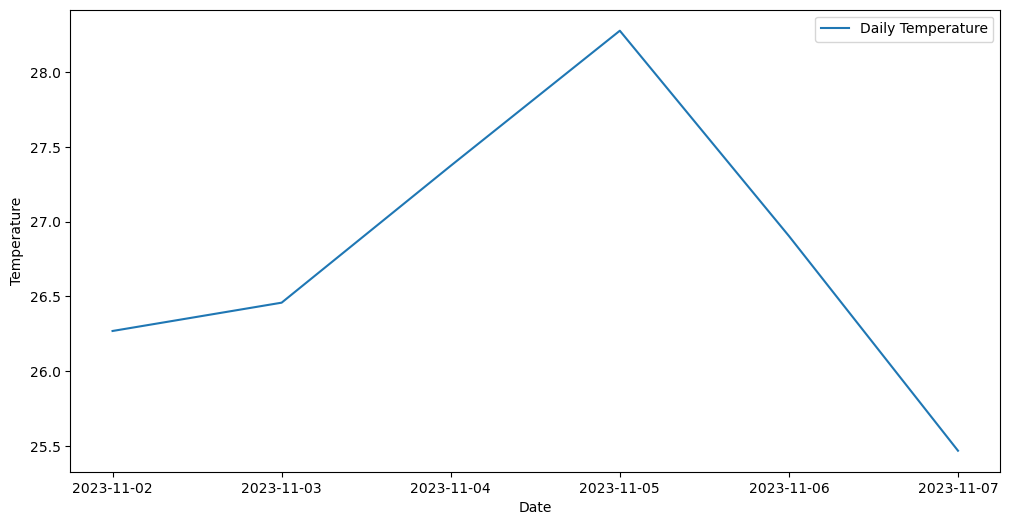

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data, label='Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


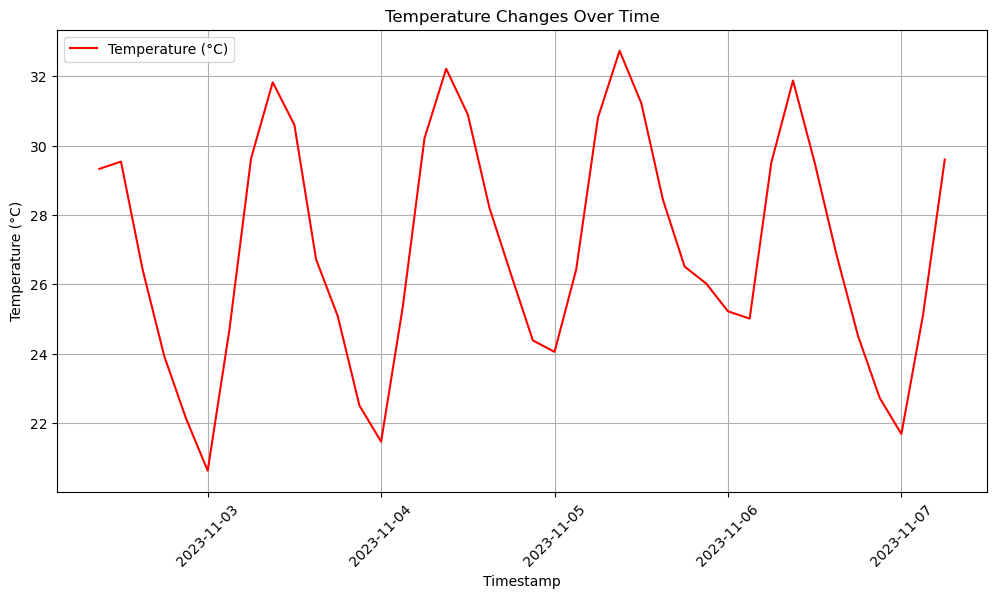

In [103]:
# Line Chart for Temperature Changes
plt.figure(figsize=(12, 6))
plt.plot(weather_df.index, weather_df['Temperature (°C)'], label='Temperature (°C)', color='r')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Changes Over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<BarContainer object of 40 artists>

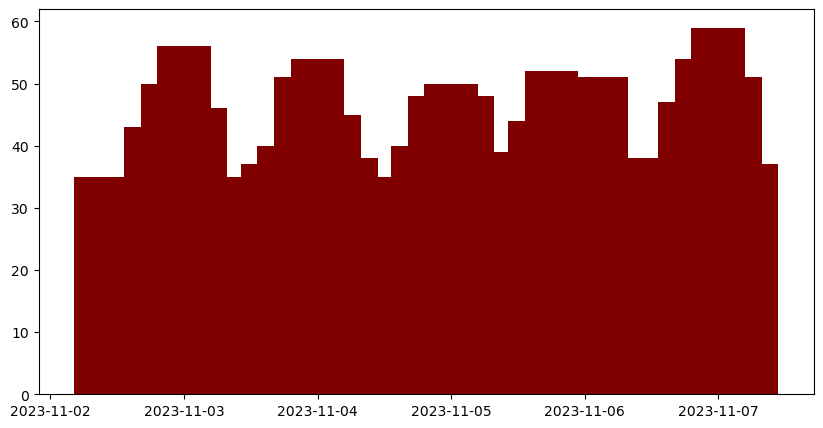

In [105]:
fig = plt.figure(figsize = (10, 5))
plt.bar(weather_df.index,weather_df['Humidity (%)'], color ='maroon', width = 0.4)

In [110]:
daily_mean = weather_df[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)']].resample('D').mean()

In [111]:
daily_mean

,Temperature (°C),Humidity (%),Wind Speed (m/s)
Timestamp,,,
2023-11-02,26.268000,39.400,2.184000
2023-11-03,26.457500,40.750,1.847500
2023-11-04,27.373750,40.500,2.353750
2023-11-05,28.277500,43.875,2.400000
2023-11-06,26.903750,43.000,3.303750
2023-11-07,25.466667,49.000,2.506667


In [112]:
monthly_mean = weather_df[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)']].resample('M').mean()

In [113]:
monthly_mean

,Temperature (°C),Humidity (%),Wind Speed (m/s)
Timestamp,,,
2023-11-30,26.996,42.225,2.442


In [114]:
Quarter_mean = weather_df[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)']].resample('Q').mean()

In [116]:
Quarter_mean

,Temperature (°C),Humidity (%),Wind Speed (m/s)
Timestamp,,,
2023-12-31,26.996,42.225,2.442


In [121]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/102.3 kB ? eta -:--:--
     ----------- ------------------------- 30.7/102.3 kB 435.7 kB/s eta 0:00:01
     -------------- ---------------------- 41.0/102.3 kB 393.8 kB/s eta 0:00:01
     ------------------------------------ 102.3/102.3 kB 652.8 kB/s eta 0:00:00


In [125]:
import folium
m = folium.Map(location=[lat, lon], zoom_start=10)


In [129]:
# Create a marker with a pop-up displaying weather information
folium.Marker(
    location=[lat, lon],
    popup=f"Temperature: {temperatures}°C<br>Humidity: {humidity}%<br>Description: {weather_description}",
).add_to(m)

# Save the map as an HTML file or display it in a Jupyter Notebook
m.save('weather_map.html')